In [2]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [3]:
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import scipy
from nxcals.api.extraction.data.builders import *

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [4]:
start = datetime.strptime("2022-11-27 15:00", "%Y-%m-%d %H:%M")
end = start + timedelta(hours = 3)

while end < datetime.strptime("2022-11-28 06:00", "%Y-%m-%d %H:%M"):
    print(f"start: {start}")
    print(f"end: {end}")
    
    df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PR.BMEAS-B-ST/Samples").build().select('acqStamp', 'samples', 'selector').toPandas()
    
    d = {'timestamp': [], 'samples': [], "selector": []}
    dfb = pd.DataFrame(data=d)

    user = ["CPS.USER.EAST3", "CPS.USER.EAST4", "CPS.USER.MD5", "CPS.USER.MD6"]
    for user in user:
        d = {'timestamp': df.where(df.selector==user).acqStamp, 'samples': df.where(df.selector==user).samples, "selector": df.where(df.selector==user).selector}
        dfb_inter = pd.DataFrame(data=d)
        dfb_inter.dropna(inplace=True)
        dfb_inter["samples"] = dfb_inter["samples"].apply(lambda x: x["elements"])
        dfb_inter.reset_index(drop=True, inplace=True)

        dfb = pd.concat([dfb,dfb_inter])
    dfb.reset_index(drop=True, inplace=True)
    
    with open('bfield/'+str(datetime.strftime(start, "%Y_%m_%d_%H_%M"))+'.pickle', 'wb') as handle:
        pickle.dump(dfb, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    start = start + timedelta(hours = 3)
    end = end + timedelta(hours = 3)
    print("")
dfb.reset_index(drop=True, inplace=True)

start: 2022-11-27 15:00:00
end: 2022-11-27 18:00:00

start: 2022-11-27 18:00:00
end: 2022-11-27 21:00:00

start: 2022-11-27 21:00:00
end: 2022-11-28 00:00:00

start: 2022-11-28 00:00:00
end: 2022-11-28 03:00:00



In [20]:
# d = {'timestamp': [], 'samples': [], "selector": []}
# dfb = pd.DataFrame(data=d)

# user = ["CPS.USER.EAST3", "CPS.USER.EAST4", "CPS.USER.MD5"]
# for user in user:
#     d = {'timestamp': df.where(df.selector==user).acqStamp, 'samples': df.where(df.selector==user).samples, "selector": df.where(df.selector==user).selector}
#     dfb_inter = pd.DataFrame(data=d)
#     dfb_inter.dropna(inplace=True)
#     dfb_inter["samples"] = dfb_inter["samples"].apply(lambda x: x["elements"])
#     dfb_inter.reset_index(drop=True, inplace=True)

#     dfb = pd.concat([dfb,dfb_inter])
# dfb.reset_index(drop=True, inplace=True)

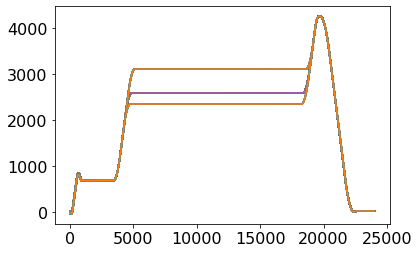

In [21]:
fig, ax = plt.subplots()
for i in range(len(dfb)):
    ax.plot(dfb.samples[i])

In [15]:
import sys

def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                             _:  1.7 MiB
                            df:  1.7 MiB
                           _13:  1.7 MiB
                           ___:  1.2 KiB
                     DataFrame:  1.2 KiB
                  SparkSession:  1.2 KiB
                            _8:  1.2 KiB
                            __:  1.0 KiB
                 ArgumentError:  1.0 KiB
                       Builder:  1.0 KiB
